<center><h1> Porter</h1></center>

Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the country's $40 billion intra-city logistics market, Porter strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence. Currently, the company has serviced 5+ million customers

Porter works with a wide range of restaurants for delivering their items directly to the people.

Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.

This dataset has the required data to train a regression model that will do the delivery time estimation, based on all those features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats.mstats import winsorize

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import warnings

# Ignore future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
plt.style.use("seaborn-v0_8-notebook")

%matplotlib inline

### <font color='289C4E'>Table of contents<font><a class='anchor' id='top'></a>
1. [Data Dictionary](#data)
2. [Univariate Analysis](#univariate)
3. [Bivariate Analysis](#bivariate)
4. [Multivariate Analysis](#multivariate)
5. [Data Preprocessing and Feature Engineering](#feature_eng)
6. [Change cell background colors](#background)

# 1. Data Dictionary <a class='anchor' id='data'></a> [↑](#top)


Each row in this file corresponds to one unique delivery. Each column corresponds to a feature as explained below.

* market_id : integer id for the market where the restaurant lies
* actual_delivery_time : the timestamp when the order was delivered
* created_at : the timestamp at which the order was placed
* store_primary_category : category for the restaurant
* order_protocol : integer code value for order protocol(how the order was placed ie: through porter, call to restaurant, pre booked, third part etc)
* total_items_subtotal : final price of the order
* num_distinct_items : the number of distinct items in the order
* min_item_price : price of the cheapest item in the order
* max_item_price : price of the costliest item in order
* total_onshift_partners : number of delivery partners on duty at the time order was placed
* total_busy_partners : number of delivery partners attending to other tasks
* total_outstanding_orders : total number of orders to be fulfilled at the moment

In [2]:
porter = pd.read_csv("data/porter.csv", parse_dates=['created_at', 'actual_delivery_time'])
porter.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [3]:
porter.shape

(197428, 14)

In [4]:
porter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 196441 non-null  float64       
 1   created_at                197428 non-null  datetime64[ns]
 2   actual_delivery_time      197421 non-null  datetime64[ns]
 3   store_id                  197428 non-null  object        
 4   store_primary_category    192668 non-null  object        
 5   order_protocol            196433 non-null  float64       
 6   total_items               197428 non-null  int64         
 7   subtotal                  197428 non-null  int64         
 8   num_distinct_items        197428 non-null  int64         
 9   min_item_price            197428 non-null  int64         
 10  max_item_price            197428 non-null  int64         
 11  total_onshift_partners    181166 non-null  float64       
 12  to

* Data has null values.
* Two object type columns and rest are numerical.

In [5]:
porter.describe().T

,count,mean,min,25%,50%,75%,max,std
market_id,196441.0,2.978706,1.0,2.0,3.0,4.0,6.0,1.524867
created_at,197428,2015-02-04 22:00:09.537962752,2014-10-19 05:24:15,2015-01-29 02:32:42,2015-02-05 03:29:09.500000,2015-02-12 01:39:18.500000,2015-02-18 06:00:44,NaN
actual_delivery_time,197421,2015-02-04 22:48:23.348914432,2015-01-21 15:58:11,2015-01-29 03:22:29,2015-02-05 04:40:41,2015-02-12 02:25:26,2015-02-19 22:45:31,NaN
order_protocol,196433.0,2.882352,1.0,1.0,3.0,4.0,7.0,1.503771
total_items,197428.0,3.196391,1.0,2.0,3.0,4.0,411.0,2.666546
subtotal,197428.0,2682.331402,0.0,1400.0,2200.0,3395.0,27100.0,1823.093688
num_distinct_items,197428.0,2.670791,1.0,1.0,2.0,3.0,20.0,1.630255
min_item_price,197428.0,686.21847,-86.0,299.0,595.0,949.0,14700.0,522.038648
max_item_price,197428.0,1159.58863,0.0,800.0,1095.0,1395.0,14700.0,558.411377
total_onshift_partners,181166.0,44.808093,-4.0,17.0,37.0,65.0,171.0,34.526783


* There are negative values also in columns min_item_price, total_onshift_partners, total_busy_partners and total_outstanding_orders.
* Many numerical columns have big difference between 75 percentile and 100 percentile value. Means data is right skewed.

In [6]:
porter.describe(include=object)

,store_id,store_primary_category
count,197428,192668
unique,6743,74
top,d43ab110ab2489d6b9b2caa394bf920f,american
freq,937,19399


* American is the most common primary category of stores.

In [7]:
# Percentage of null values in columns
round(porter[porter.columns[porter.isnull().any()]].isnull().sum()*100/len(porter),2)

market_id                   0.50
actual_delivery_time        0.00
store_primary_category      2.41
order_protocol              0.50
total_onshift_partners      8.24
total_busy_partners         8.24
total_outstanding_orders    8.24
dtype: float64

* 7 columns have null values. 3 columns have more than 8 % missing data.

In [8]:
porter.nunique(dropna=True)

market_id                        6
created_at                  180985
actual_delivery_time        178110
store_id                      6743
store_primary_category          74
order_protocol                   7
total_items                     57
subtotal                      8368
num_distinct_items              20
min_item_price                2312
max_item_price                2652
total_onshift_partners         172
total_busy_partners            159
total_outstanding_orders       281
dtype: int64

* Many columns have less unique values. 
* We can convert columns that have categorical data to categorical type.

In [9]:
porter.actual_delivery_time.isna().sum()

7

* 7 rows don't have delivery time, we will be dropping those rows.

In [10]:
porter = porter.dropna(subset=['actual_delivery_time'])

In [11]:
# Creating estimated delivery time and other extra columns from datetime columns
# Dropping columns created_at and actual_delivery_time as it is not usefull
df = (porter
        .assign(
            est_delivery_time = pd.to_timedelta(porter.actual_delivery_time - porter.created_at).dt.total_seconds() / 60,
            created_at_day = porter.created_at.dt.day,
            created_at_weekday = porter.created_at.dt.weekday,
            created_at_hour = porter.created_at.dt.hour,
            )
        .drop(['created_at', 'actual_delivery_time'], axis=1)
)
df

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,est_delivery_time,created_at_day,created_at_weekday,created_at_hour
0,1.0,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,6,4,22
1,2.0,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,10,1,21
2,3.0,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.683333,22,3,20
3,3.0,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.250000,3,1,21
4,3.0,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.833333,15,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,65.116667,17,1,0
197424,1.0,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,56.383333,13,4,0
197425,1.0,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,50.133333,24,5,4
197426,1.0,c81e155d85dae5430a8cee6f2242e82c,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,65.116667,1,6,18


In [12]:
# Columns categories
cat_cols = ['store_primary_category', 'market_id', 'order_protocol', 'num_distinct_items', 
            'created_at_day', 'created_at_weekday', 'created_at_hour']
num_cols = [ 'total_items', 'subtotal', 'min_item_price', 'max_item_price', 'total_onshift_partners', 'total_busy_partners', 
            'total_outstanding_orders', 'est_delivery_time']
obj_cols = ['store_id', ]

In [13]:
# pd.crosstab(index=df.market_id, columns=df.order_protocol)
# pd.crosstab(index=df.order_protocol, columns=df.market_id).idxmax()

In [14]:
# fill Null values of columns 
# market_id = mode of market_id
# order_protocol = order_protocol which has max count by market_id
# store_primary_category = store_primary_category which has max count by market_id

def fill_na(df):
    df.market_id = df.market_id.fillna(df.market_id.mode()[0])
    df.order_protocol = df.groupby('market_id')['order_protocol'].transform(lambda x: x.fillna(x.value_counts().index[0]))
    df.store_primary_category = df.groupby('market_id')['store_primary_category'].transform(lambda x: x.fillna(x.value_counts().index[0]))
    return df

In [15]:
# Filling missing values in market_id, order_protocol, store_primary_category and 
# dropping rows that have NAN values in columns total_onshift_partners, total_busy_partners, total_outstanding_orders.
df = df.pipe(fill_na).dropna()

In [16]:
df.isna().sum()

market_id                   0
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
est_delivery_time           0
created_at_day              0
created_at_weekday          0
created_at_hour             0
dtype: int64

---

# 2. Univariate Analysis <a class='anchor' id='univariate' ></a> [↑](#top)

In [142]:
# functions to annotate bars in bar chart

def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for
             p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - .1
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height()
            ax.annotate(percentage, (x, y), fontsize=10, color='black')

# example : with_hue(ax,g1.Content_Type,2,2)

def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax.annotate(percentage, (x, y), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

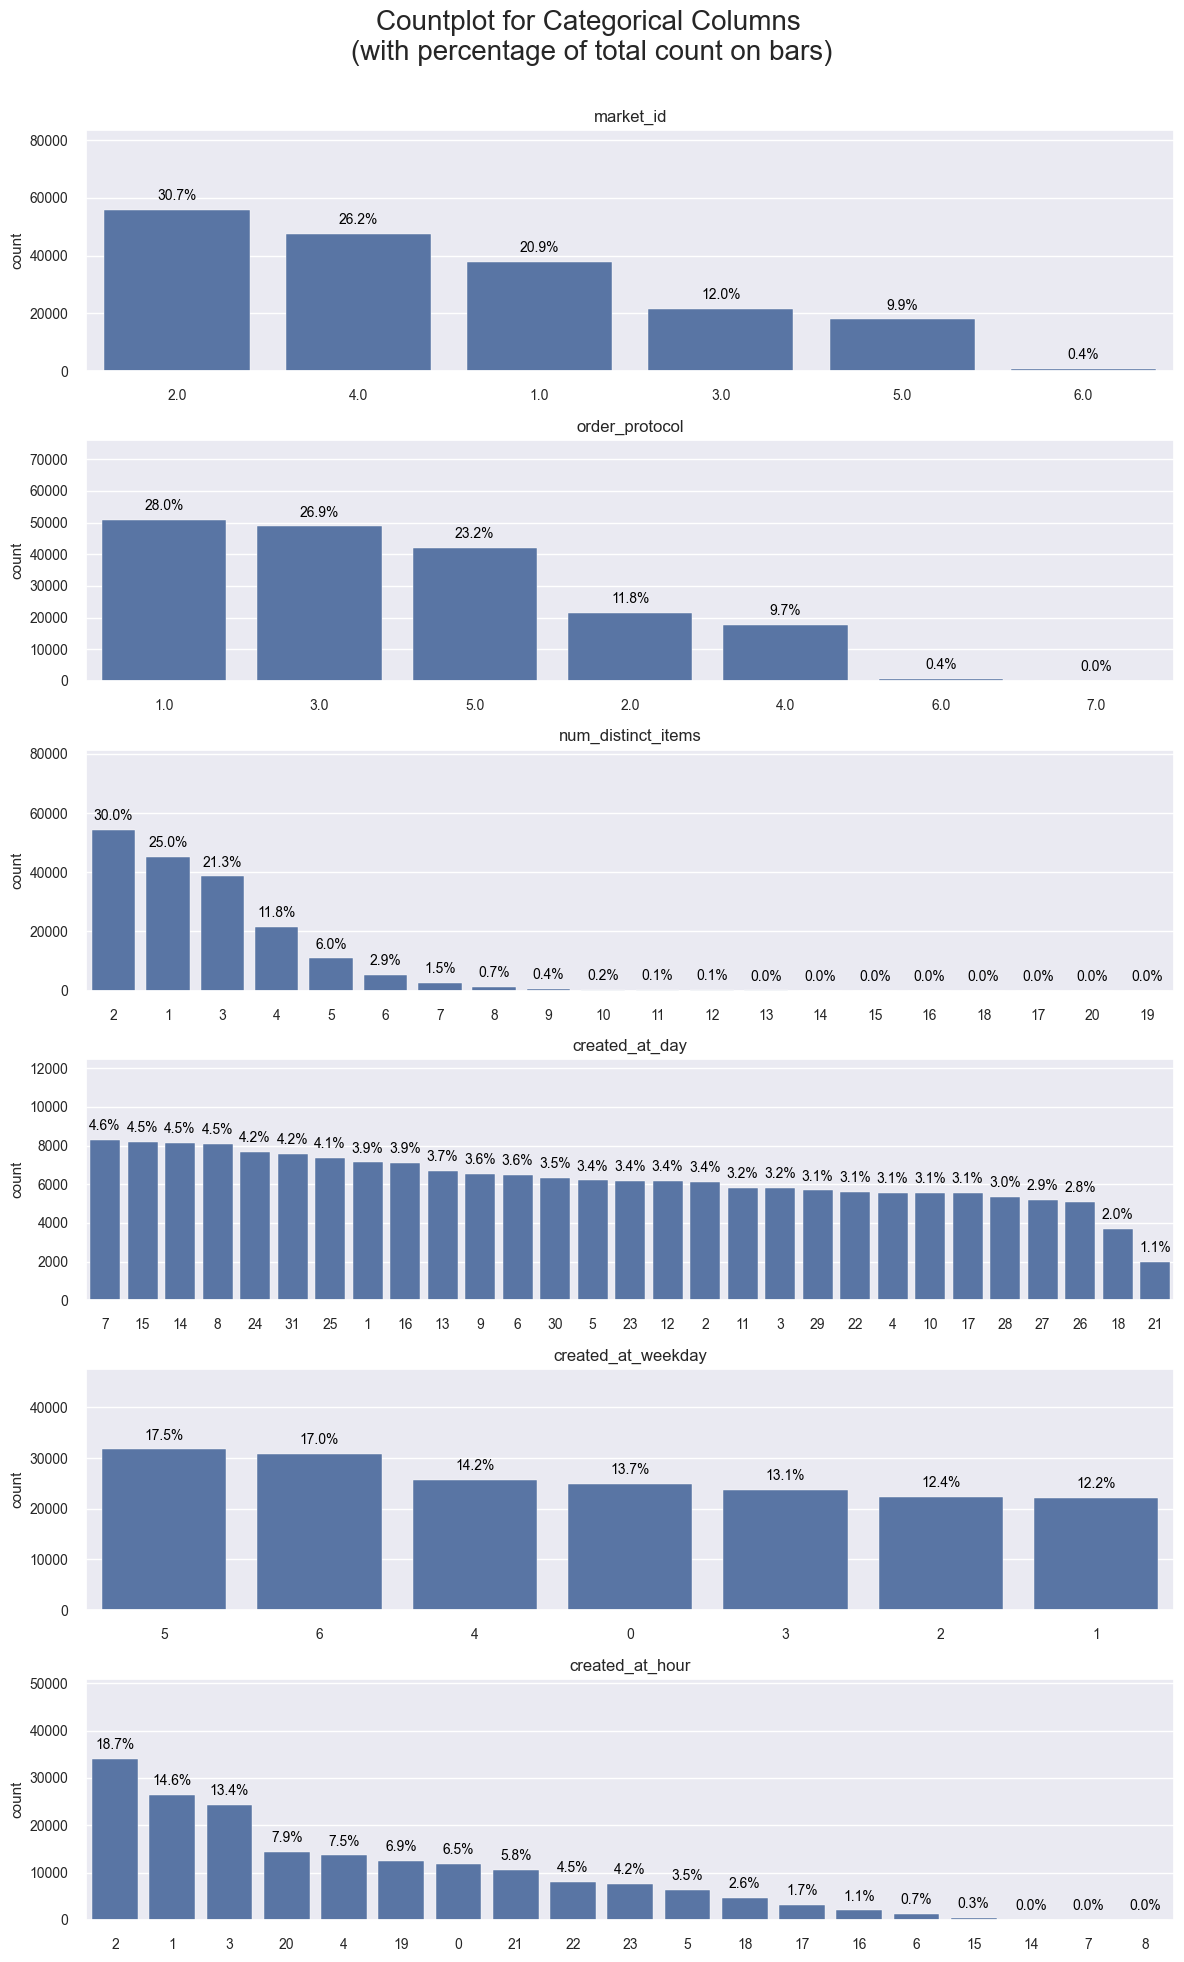

In [143]:
fig, axs = plt.subplots(nrows=len(cat_cols[1:]), ncols=1, figsize=(12,20))
plt.subplots_adjust(hspace=0.4)

for column, ax in zip(df[cat_cols[1:]], axs.ravel()):
    sns.countplot(x=df[column], ax=ax, order = df[column].value_counts().head(30).index)
    ax.set_title(column)
    ax.set_xlabel('')
    without_hue(ax, df[column])
    ax.set_ylim(top=df[column].value_counts().max()*1.5)  # adjust ylim to fit labels

fig.suptitle('Countplot for Categorical Columns \n(with percentage of total count on bars)', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=.92)
plt.show()

* Most restaurents lies in market_id 2 and 6 has least.
* 1, 3 and 5 are the preferred mode of order placement.
* Mostly number of distinct items in a order is less than 7.
* No major pattern can be seen in orders created on a day in month or in weekdays.
* Data has most orders created at hour 2, 1 and 3.

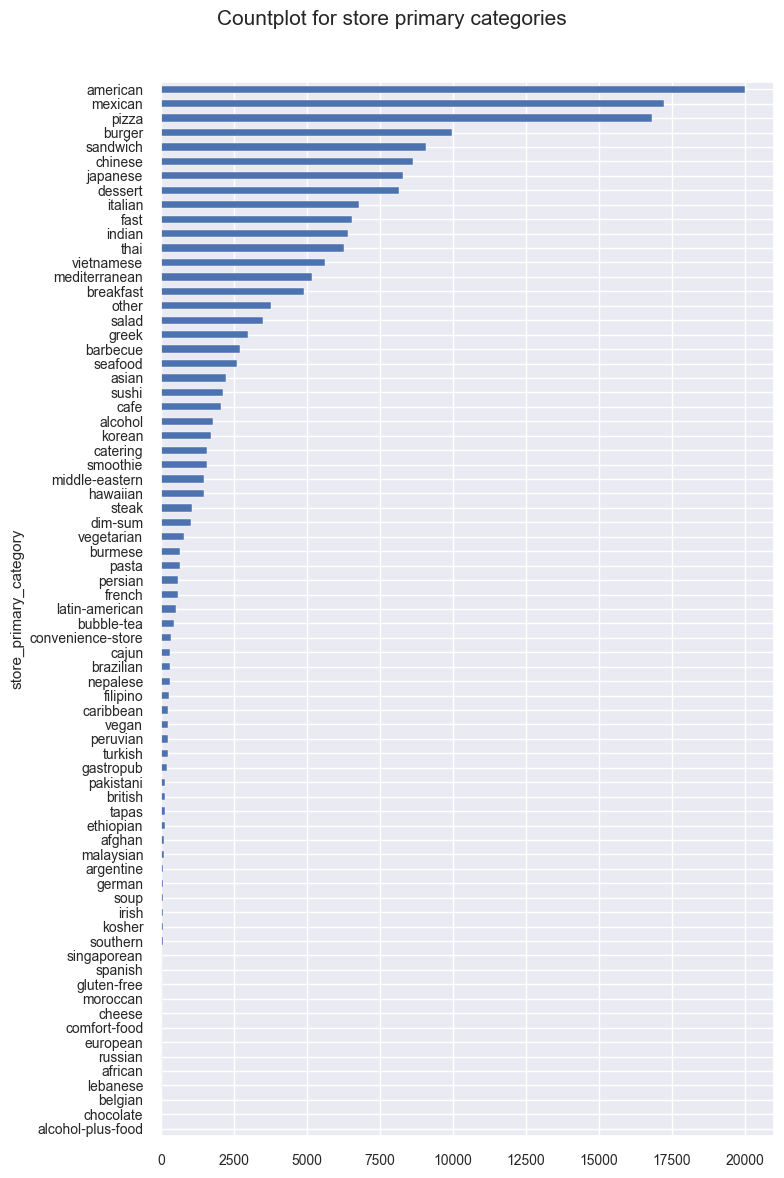

In [144]:
fig, ax = plt.subplots(figsize=(8,12))
hbars = df.store_primary_category.value_counts().plot(kind='barh', ax=ax)
ax.invert_yaxis()  # Invert the y-axis
# plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
# plt.subplots_adjust(bottom=0.6)  # Adjust the bottom margin to make room for rotated labels

plt.suptitle('Countplot for store primary categories', fontsize=15)
plt.tight_layout()
plt.subplots_adjust(top=.92)
plt.show()

* Most common primary category in stores are american, mexican and pizza.

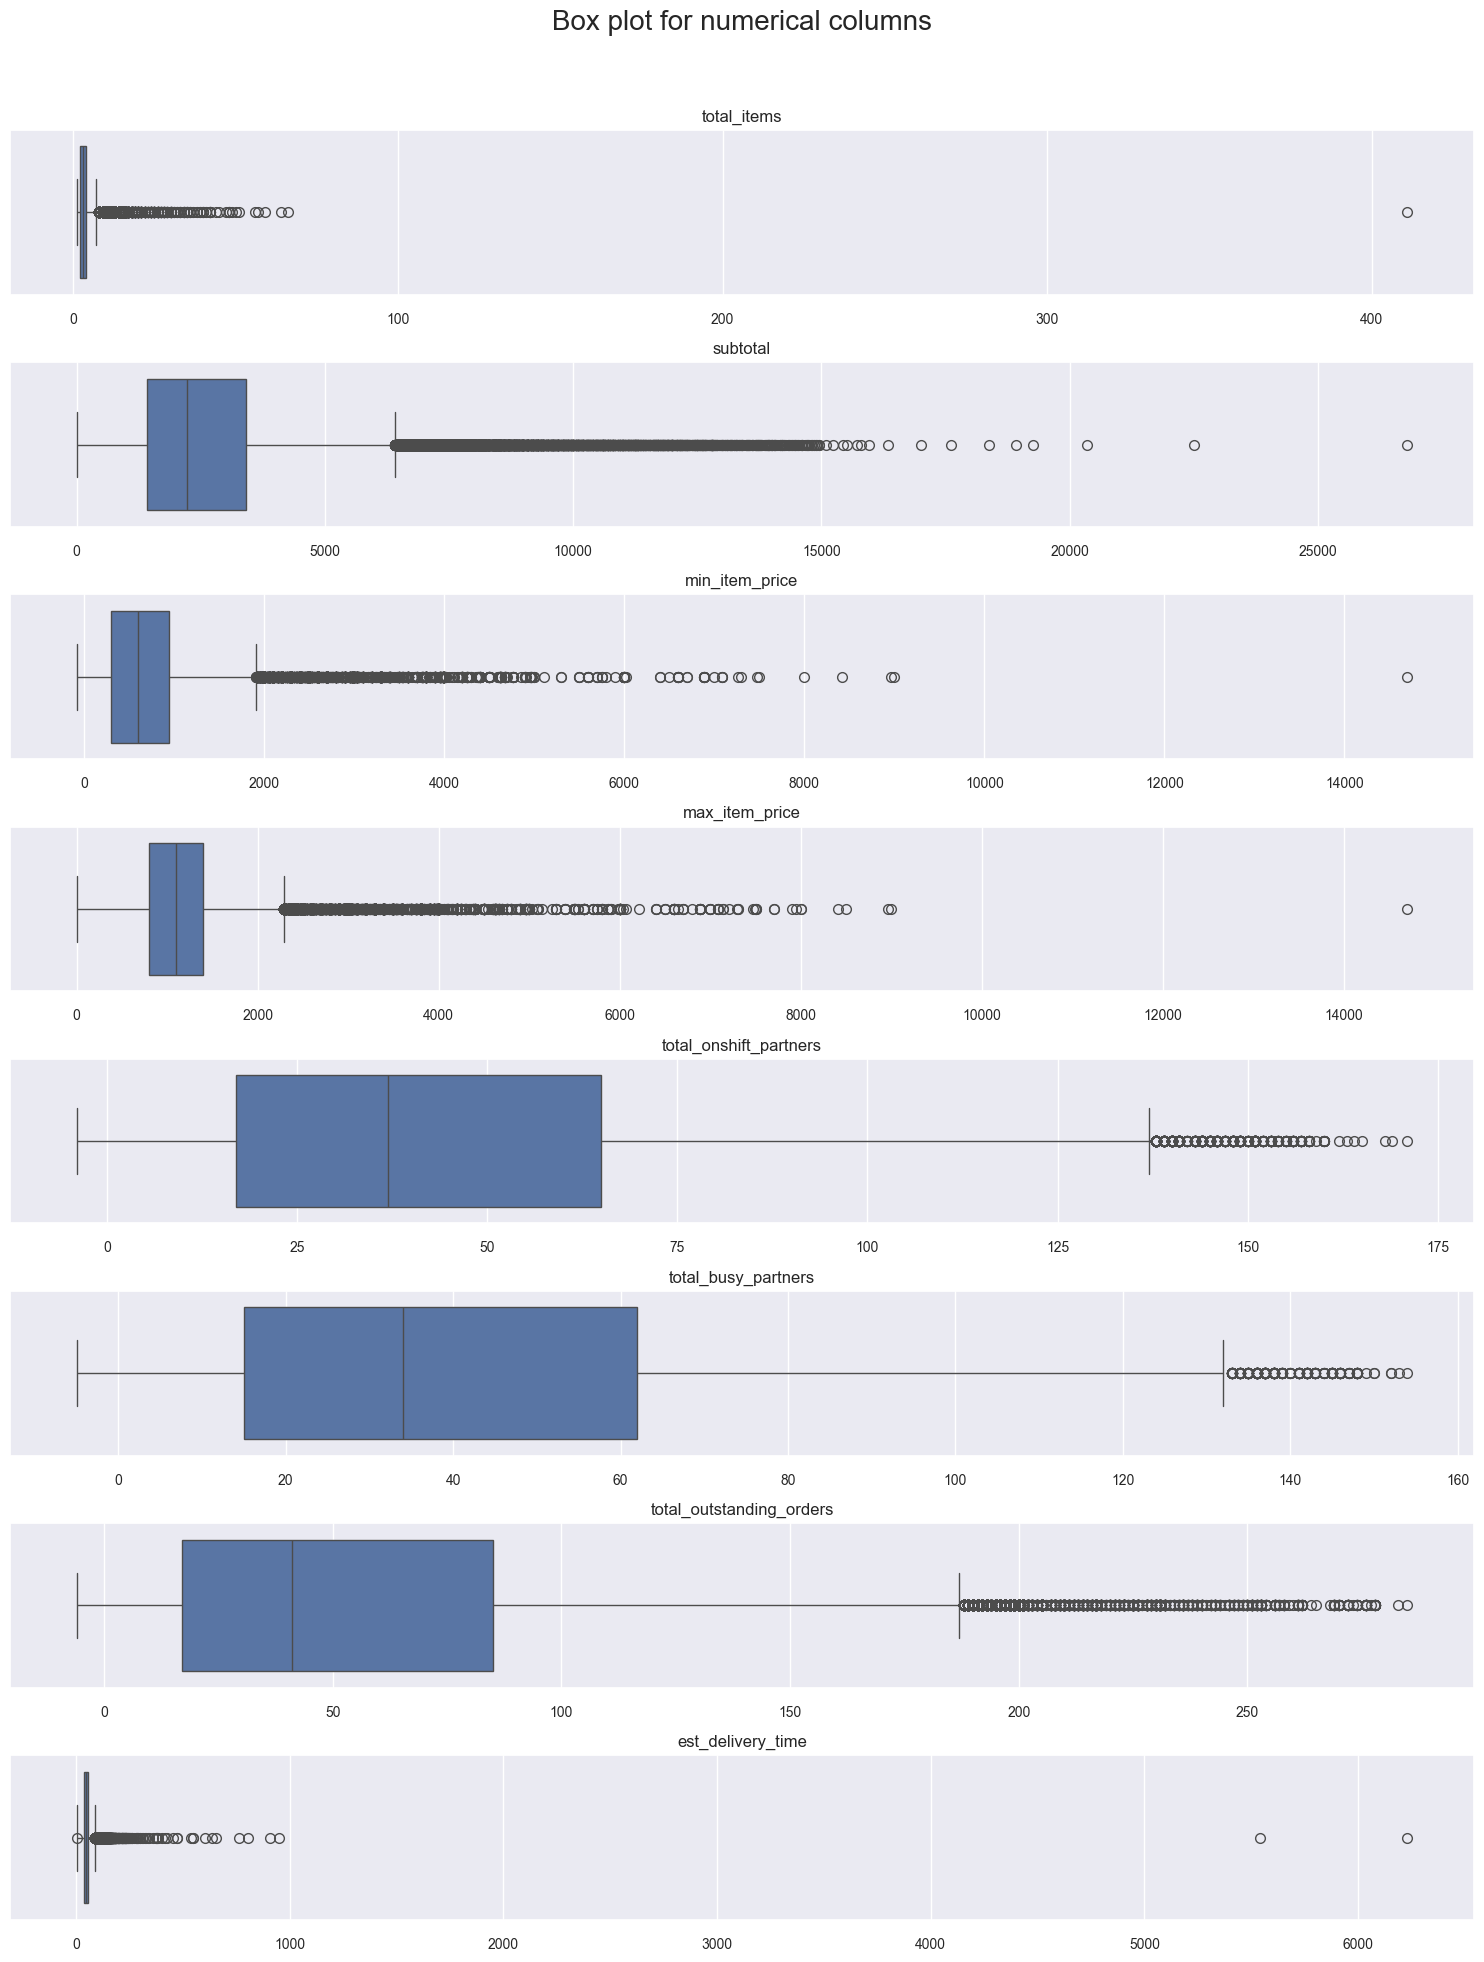

In [145]:
fig, axs = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(15,20))
plt.subplots_adjust(hspace=0.6)

for column, ax in zip(df[num_cols], axs.ravel()):
    sns.boxplot(x=df[column], ax=ax)
    ax.set_title(column)
    ax.set_xlabel('')

fig.suptitle('Box plot for numerical columns', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=.92)
plt.show()

* All numerical columns are seems to be right skewed and have a lot of outliers.
* Boxplot of columns total_onshift_partners, total_busy_partners and total_outstanding_orders have long tails in right side. 
    <br>It means they have most data below mean.

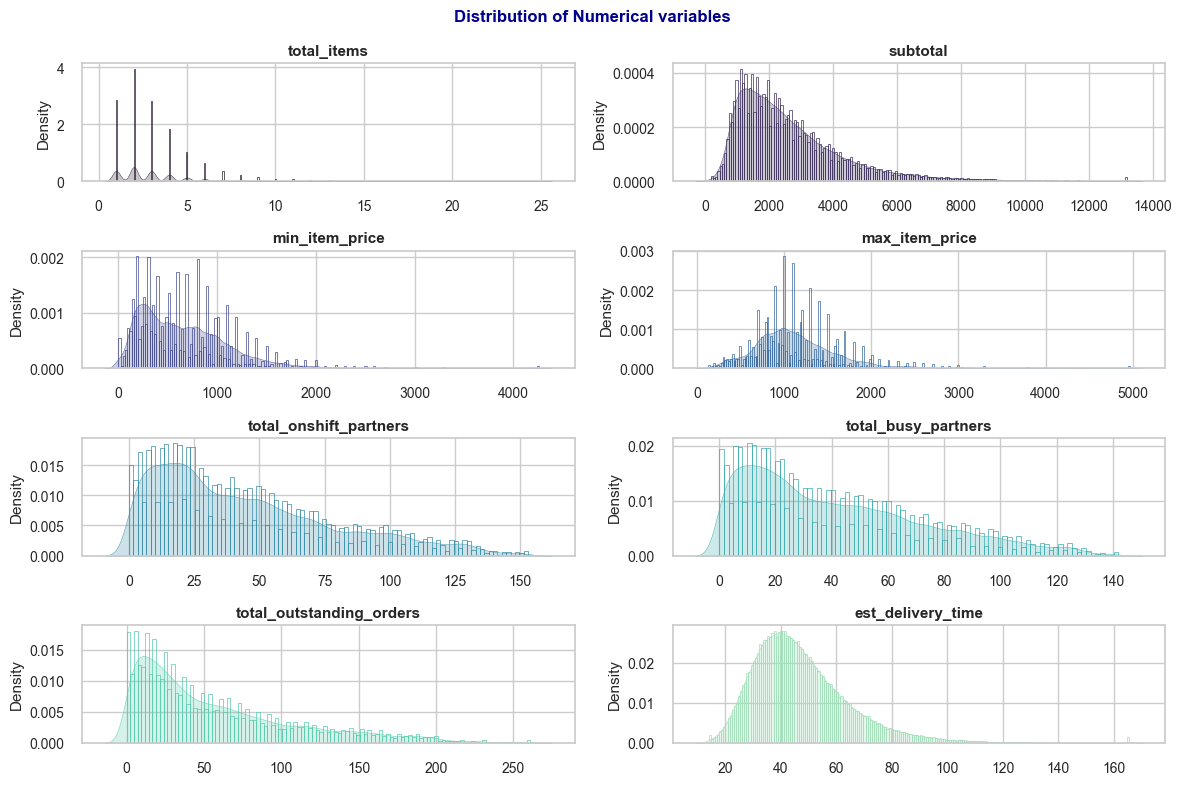

In [146]:
sns.set_style(style = 'whitegrid')
colors = sns.color_palette(palette = 'mako', n_colors = len(num_cols))

fig,axs = plt.subplots(nrows = 4, ncols = 2, figsize = (12, 8))
axs = axs.ravel()

for i,column in enumerate(num_cols):
    sns.kdeplot(x=winsorize(df[column], limits=[0.001, 0.001]).data, fill = True, color = colors[i], ax = axs[i])
    sns.histplot(x=winsorize(df[column], limits=[0.001, 0.001]).data, stat = 'density', fill = False, color = colors[i], ax = axs[i])
    axs[i].set_xlabel("")
    axs[i].set_title(column, fontsize = 11, fontweight = 'bold')

fig.suptitle("Distribution of Numerical variables", fontsize = 12, fontweight = 'bold', color = 'darkblue')
# fig.delaxes(ax = axs[5])
fig.tight_layout()
fig.show()

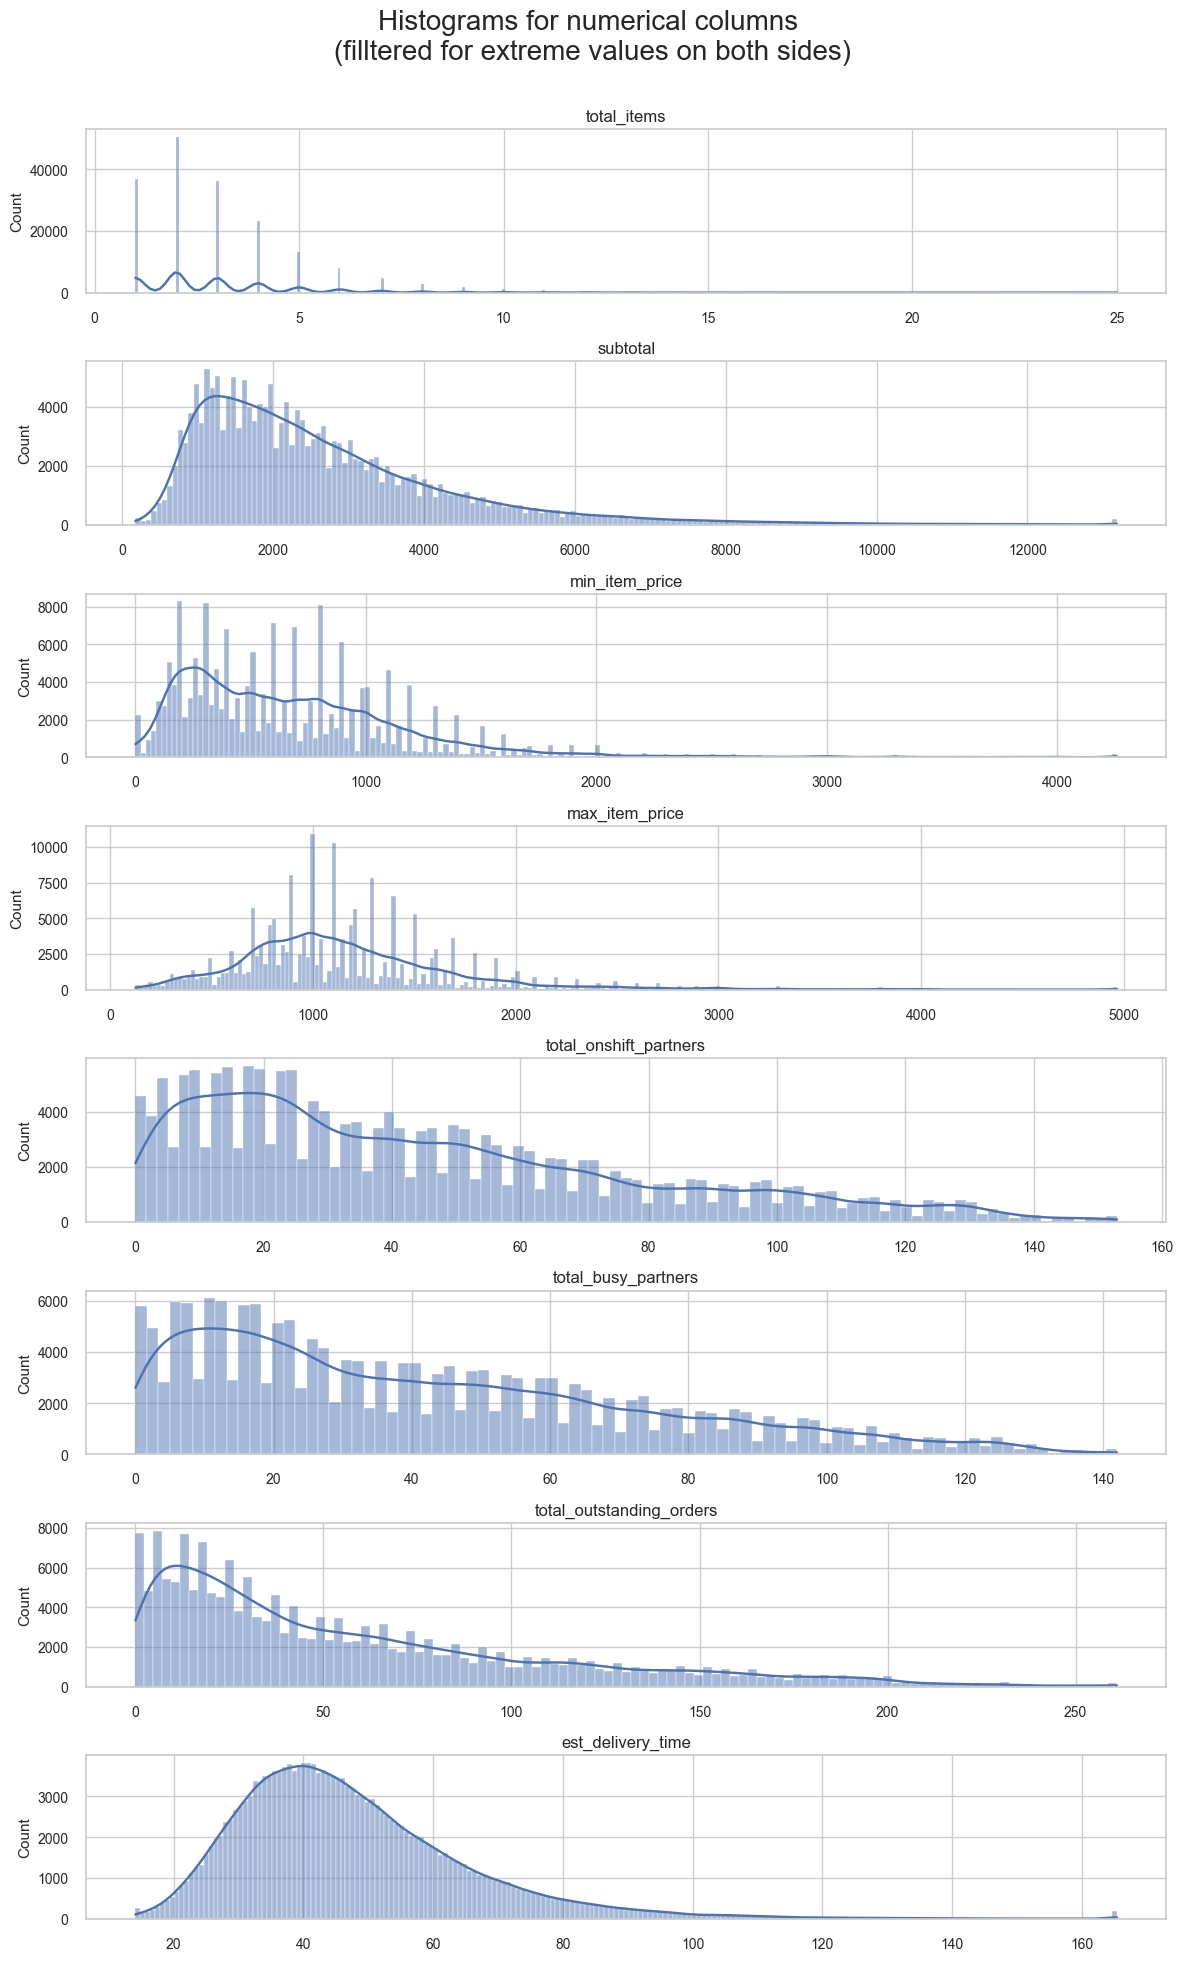

In [147]:
# Check the distribution by removing .001 percentile from both ends of num_cols
fig, axs = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(12,20))
plt.subplots_adjust(hspace=0.6)

for column, ax in zip(df[num_cols], axs.ravel()):
    sns.histplot(x=winsorize(df[column], limits=[0.001, 0.001]).data, kde=True, ax=ax)
    # winsorize does capping or truncating extreme values beyond a certain percentile.
    ax.set_title(column)
    ax.set_xlabel('')

fig.suptitle('Histograms for numerical columns \n(filltered for extreme values on both sides)', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=.92)
plt.show()

* All numerical columns are right skewed.
* Total items in an order are mostly less than 10 and 2 is the most common item count.
* Very less orders have subtotal greater than 5000.
* Price of the least expensive item in the order is below 2000 generally.
* Most orders have price around 1000 for most expensive items.
* Estimated delivery time is seems to be normally distributed.

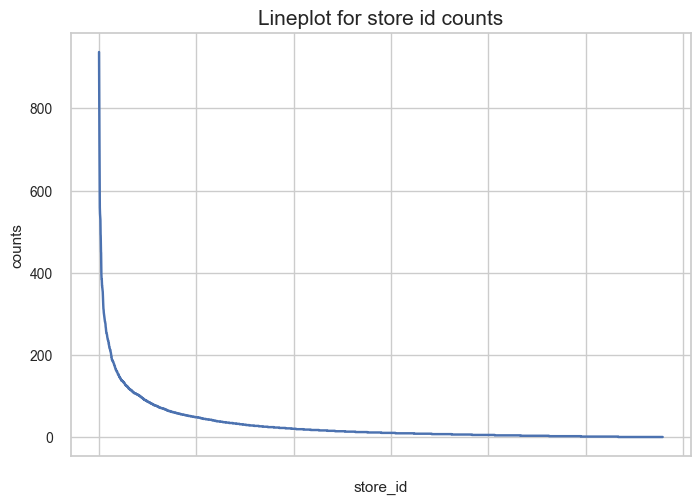

In [148]:
ax = df.store_id.value_counts().plot()
ax.set_xticklabels('')
ax.set_ylabel('counts')
plt.title('Lineplot for store id counts', fontsize=15)
plt.show()

* After some store_id's there is sudden decrease in count of orders.

<div class="alert alert-block alert-info">
<h3>Observations:</h3> 
- Most restaurents lies in market_id 2 and 6 has least.<br>
- 1, 3 and 5 are the preferred mode of order placement.<br>
- Mostly number of distinct items in a order is less than 7.<br>
- No major pattern can be seen in orders created on a day in month or in weekdays.<br>
- Data has most orders created at hour 2, 1 and 3.<br>
- Most common primary category in stores are american, mexican and pizza.<br>
- All numerical columns are seems to be right skewed and have a lot of outliers.<br>
- Boxplot of columns total_onshift_partners, total_busy_partners and total_outstanding_orders have long tails in right side. It means they have most data below mean.<br>
- All numerical columns are right skewed.<br>
- Total items in an order are mostly less than 10 and 2 is the most common item count.<br>
- Very less orders have subtotal greater than 5000.<br>
- Price of the least expensive item in the orders is below 2000 generally.<br>
- Most orders have price around 1000 for most expensive items.<br>
- Estimated delivery time is seems to be normally distributed.<br>
- After some store_id's there is sudden decrease in count of orders.<br>
</div>

---

# 3. Bivariate Analysis <a class='anchor' id='bivariate'></a> [↑](#top)

In [150]:
pd.crosstab(index=df.market_id, 
            columns=df.order_protocol, 
            margins=True,
            normalize=True,
            )\
                .style.background_gradient(cmap='YlGnBu')\
                    .format('{:.2%}')

order_protocol,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,All
market_id,,,,,,,,
1.000000,8.10%,1.47%,4.05%,2.40%,4.64%,0.23%,0.00%,20.88%
2.000000,6.25%,4.05%,9.58%,2.13%,8.68%,0.07%,0.00%,30.75%
3.000000,5.29%,1.04%,2.10%,1.69%,1.82%,0.03%,0.00%,11.97%
4.000000,4.07%,3.87%,9.71%,1.68%,6.81%,0.01%,0.00%,26.15%
5.000000,4.21%,1.30%,1.39%,1.79%,1.15%,0.04%,0.01%,9.88%
6.000000,0.11%,0.05%,0.08%,0.03%,0.09%,0.00%,0.00%,0.36%
All,28.02%,11.78%,26.92%,9.72%,23.18%,0.38%,0.01%,100.00%


In [151]:
df.columns

Index(['market_id', 'store_id', 'store_primary_category', 'order_protocol',
       'total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'est_delivery_time', 'created_at_day',
       'created_at_weekday', 'created_at_hour'],
      dtype='object')

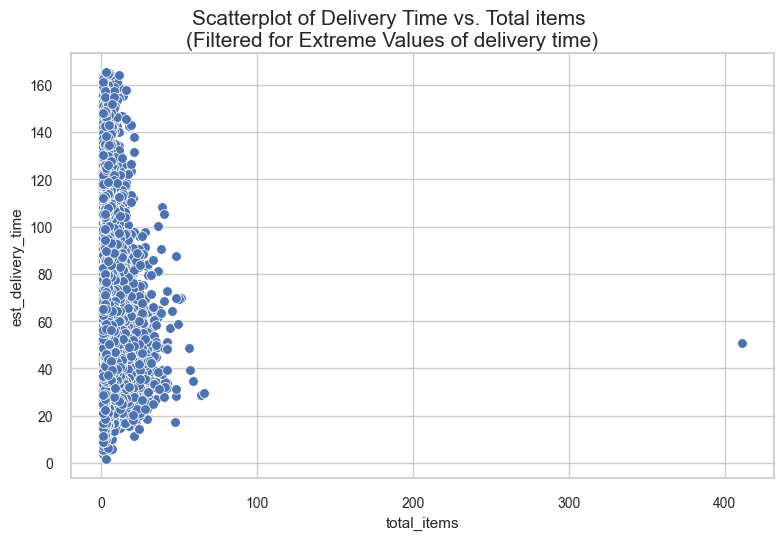

In [152]:
sns.scatterplot(data=df[df.est_delivery_time < df.est_delivery_time.quantile(0.999)], x="total_items", y="est_delivery_time")
plt.suptitle('Scatterplot of Delivery Time vs. Total items \n(Filtered for Extreme Values of delivery time)', fontsize=15)
plt.tight_layout()
plt.subplots_adjust(top=.9)
plt.show()

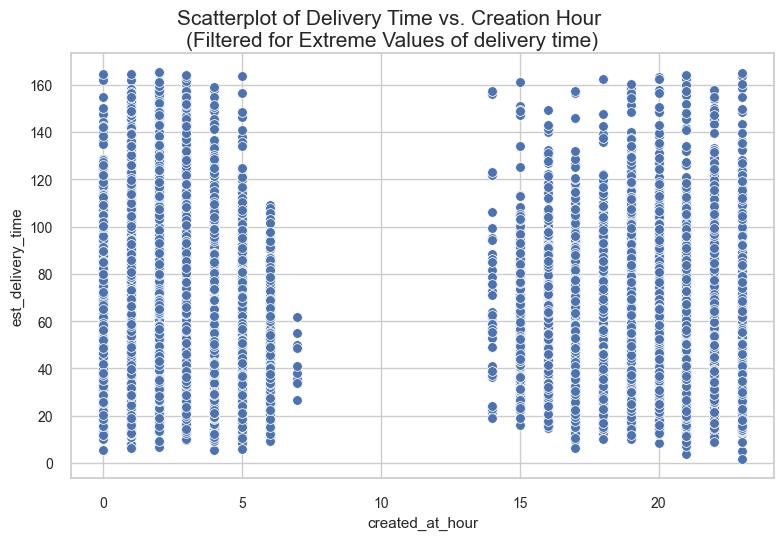

In [153]:
sns.scatterplot(data=df[df.est_delivery_time < df.est_delivery_time.quantile(0.999)], x="created_at_hour", y="est_delivery_time")
plt.suptitle('Scatterplot of Delivery Time vs. Creation Hour \n(Filtered for Extreme Values of delivery time)', fontsize=15)
plt.tight_layout()
plt.subplots_adjust(top=.9)
plt.show()

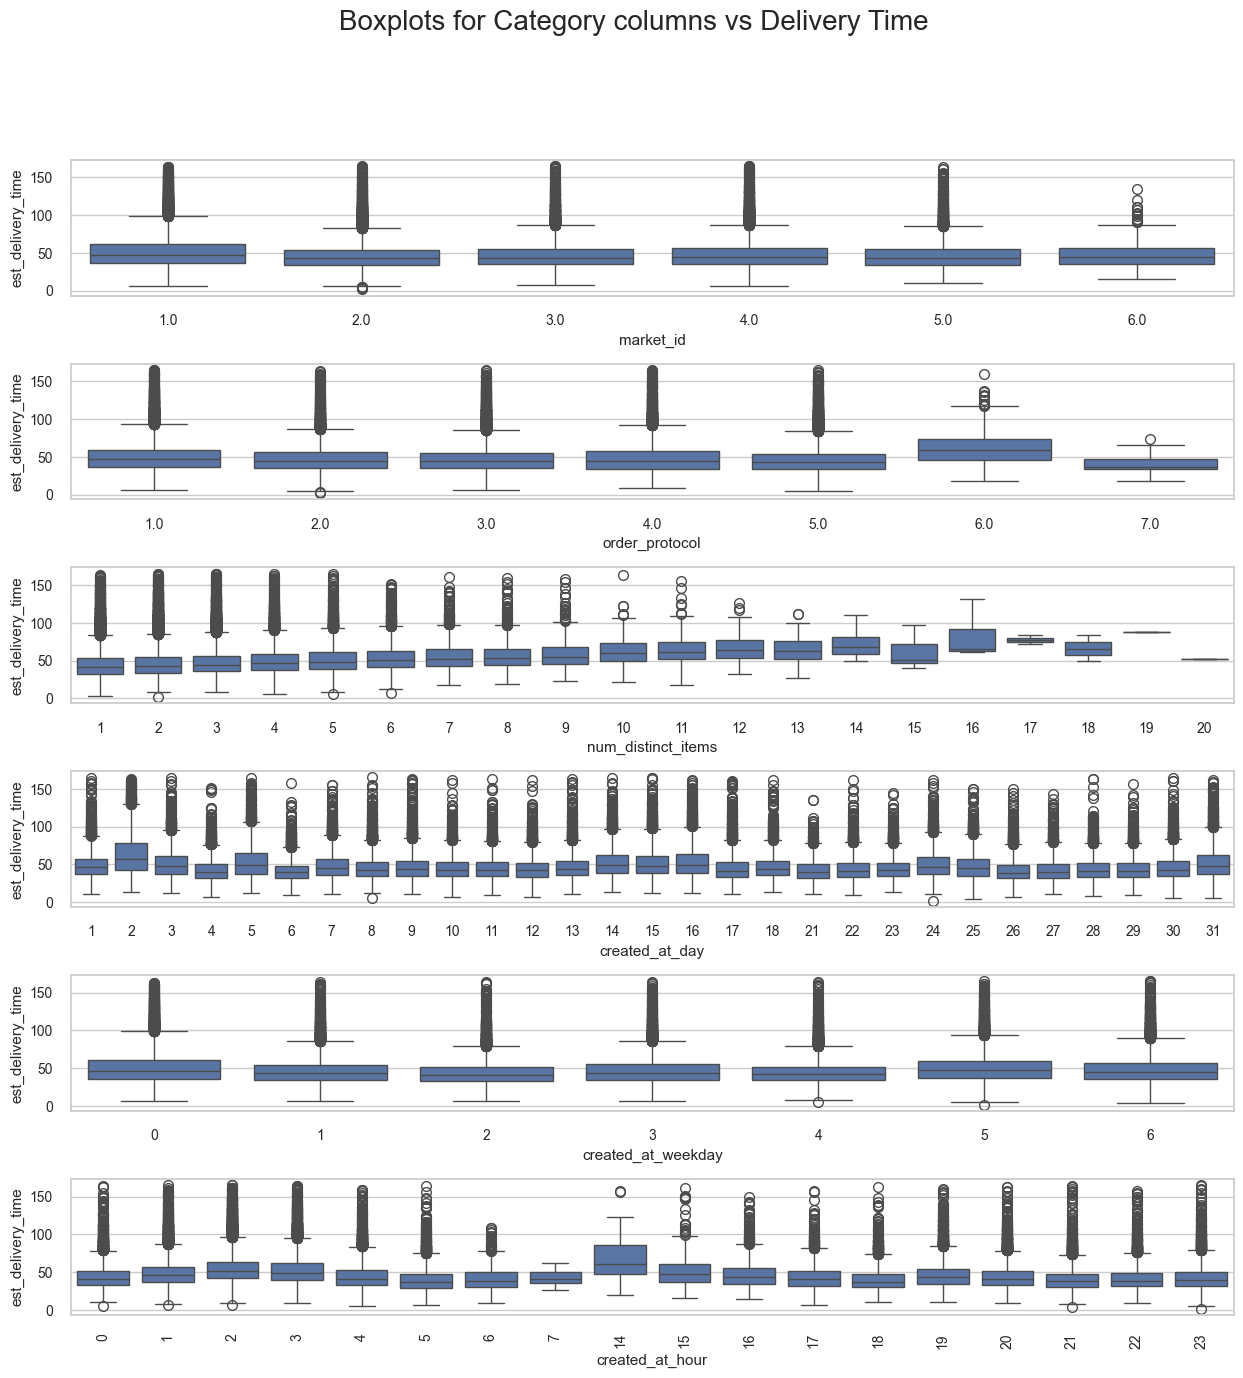

In [154]:
fig, axs = plt.subplots(nrows=len(cat_cols[1:]), ncols=1, figsize=(15,15))
plt.subplots_adjust(hspace=0.5)

fig.suptitle('Boxplots for Category columns vs Delivery Time', fontsize=20)
for col, ax in zip(cat_cols[1:], axs.ravel()):
    sns.boxplot(df[df.est_delivery_time < df.est_delivery_time.quantile(0.999)], x=col, y='est_delivery_time', ax=ax)
    plt.xticks(rotation='vertical')

plt.show()

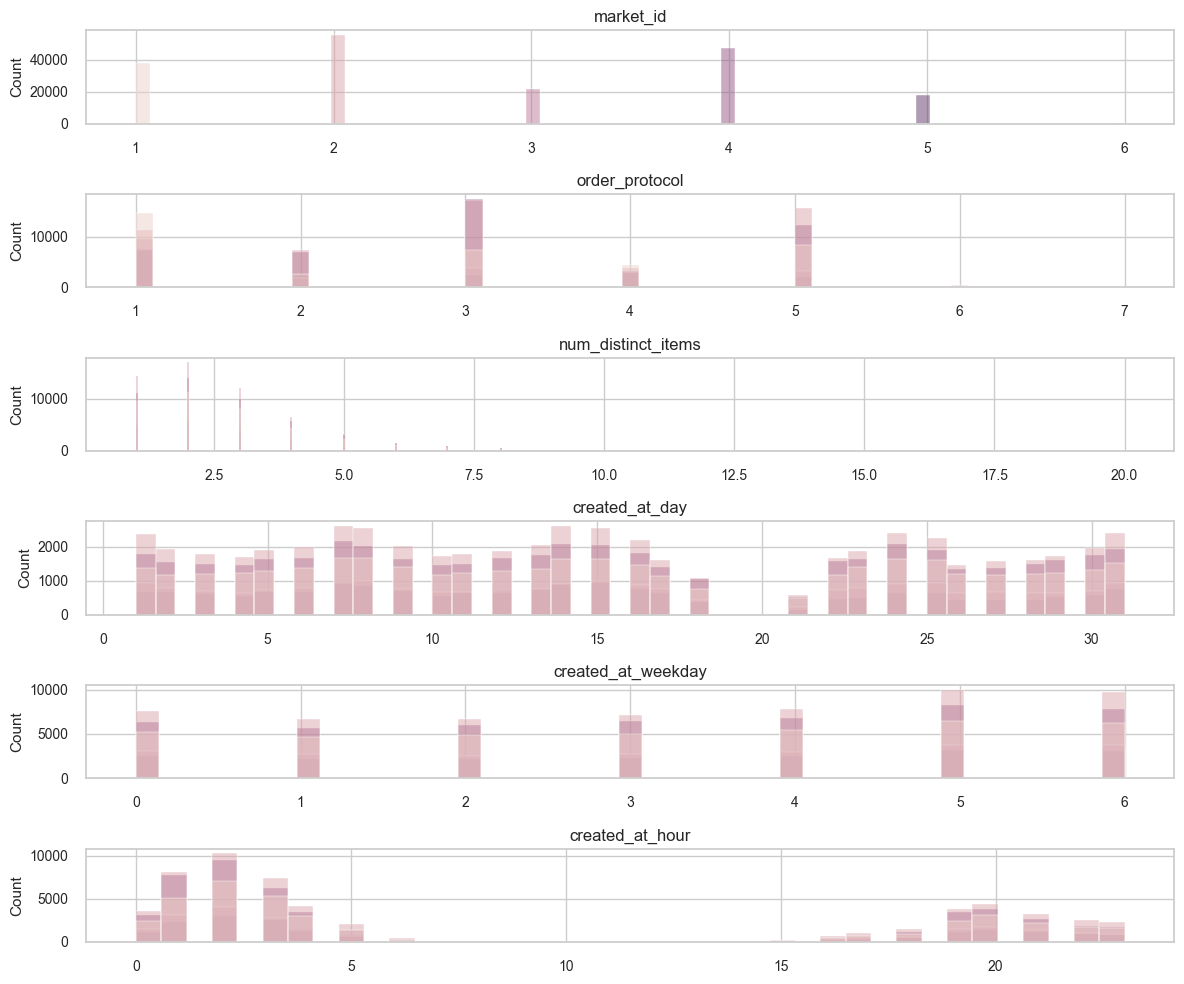

In [155]:
fig, axs = plt.subplots(nrows=len(cat_cols[1:]), ncols=1, figsize=(12,10))
plt.subplots_adjust(hspace=0.6)

for column, ax in zip(df[cat_cols[1:]], axs.ravel()):
    sns.histplot(x=df[column], ax=ax, hue=df.market_id, legend=False)
    ax.set_title(column)
    ax.set_xlabel('')
    
plt.tight_layout()
plt.show()

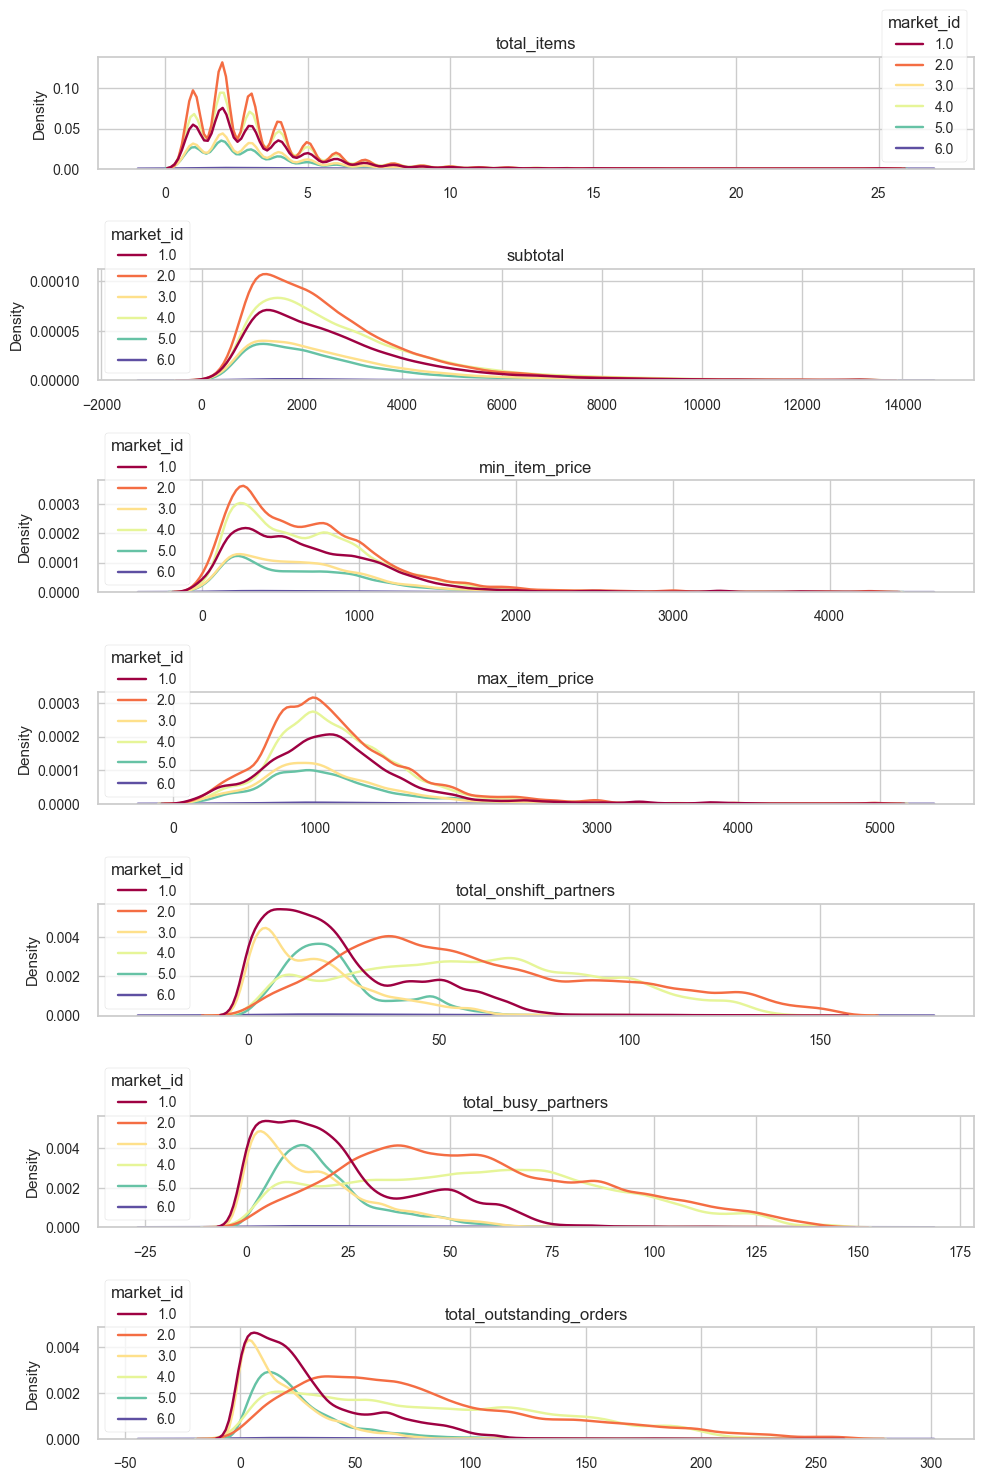

In [156]:
fig, axs = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(10,15))
plt.subplots_adjust(hspace=0.6)

for column, ax in zip(df[num_cols], axs.ravel()):
    sns.kdeplot(x=winsorize(df[column], limits=[0.001, 0.001]).data, ax=ax, hue=df.market_id, 
                palette = sns.color_palette("Spectral", as_cmap=True))
    # winsorize does capping or truncating extreme values beyond a certain percentile.
    ax.set_title(column)
    ax.set_xlabel('')

plt.tight_layout()
plt.show()

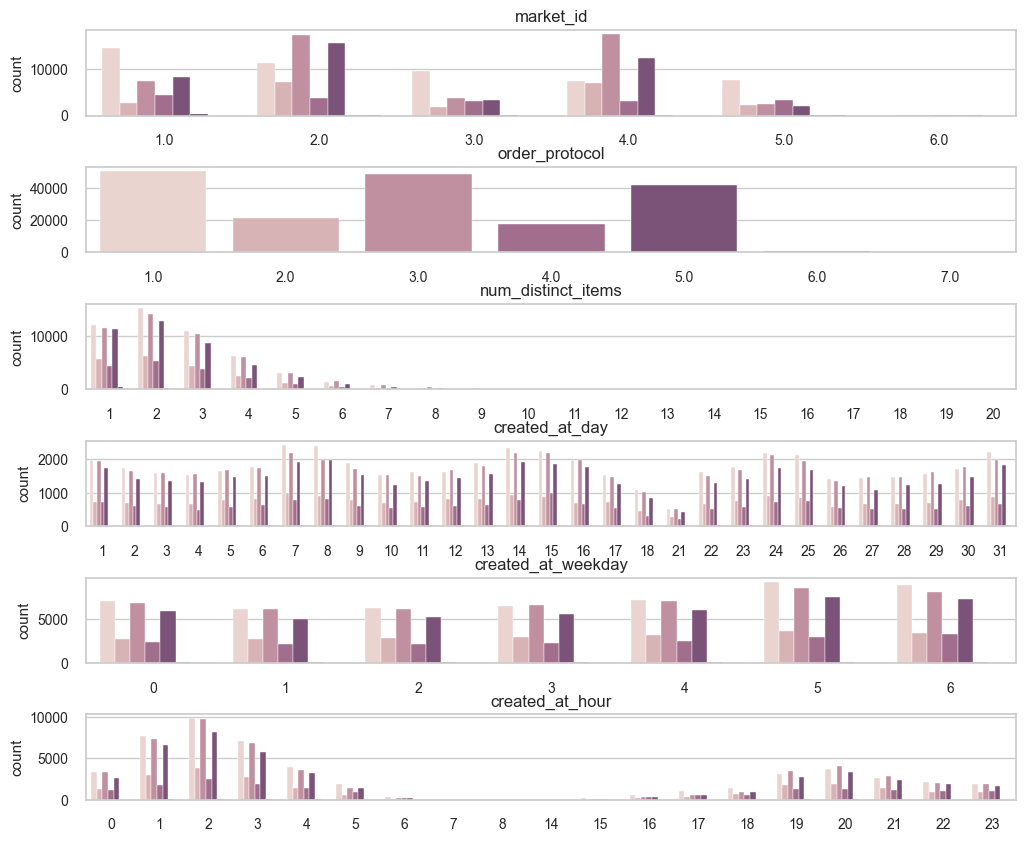

In [157]:
fig, axs = plt.subplots(nrows=len(cat_cols[1:]), ncols=1, figsize=(12,10))
plt.subplots_adjust(hspace=0.6)

for column, ax in zip(df[cat_cols[1:]], axs.ravel()):
    sns.countplot(x=df[column], ax=ax, hue=df.order_protocol, legend=False)
    ax.set_title(column)
    ax.set_xlabel('')


plt.show()

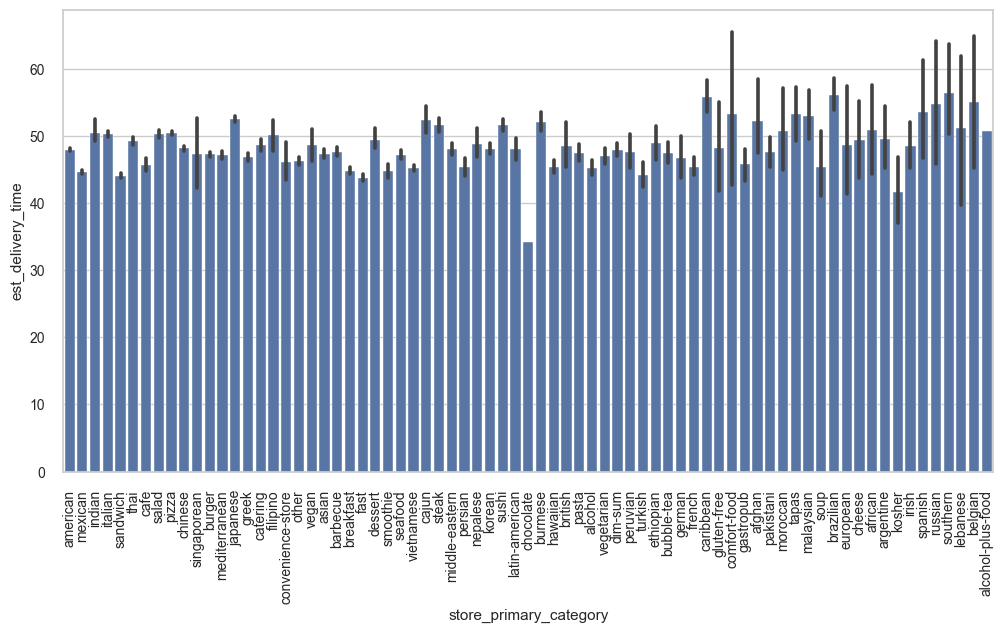

In [158]:
plt.figure(figsize=(12,6))
sns.barplot(x=df.store_primary_category, y=df.est_delivery_time)
plt.ylabel('est_delivery_time')
plt.xticks(rotation='vertical')
plt.show()

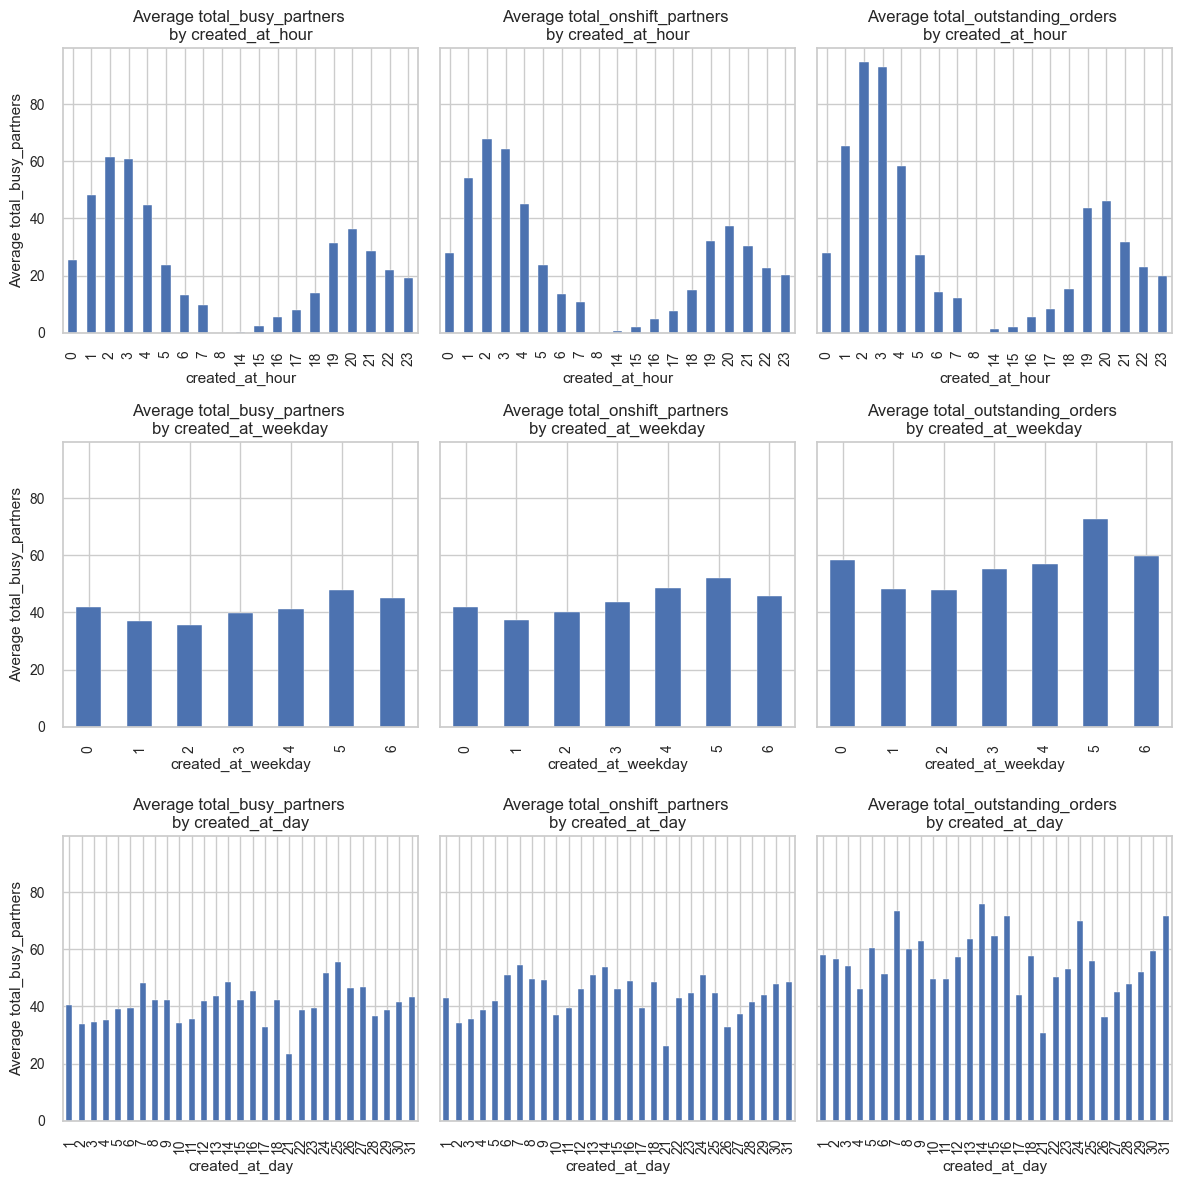

In [159]:
fig, axs = plt.subplots(3,3, figsize=(12,12), sharey=True)

axs = axs.ravel()
i = 0
for grpcol in ['created_at_hour', 'created_at_weekday', 'created_at_day']:
    for col in ['total_busy_partners', 'total_onshift_partners', 'total_outstanding_orders']:
        ax = df.groupby(grpcol)[col].mean().plot(kind='bar', ax = axs[i])
        i += 1
        ax.set_title(f'Average {col} \nby {grpcol}')
        ax.set_xlabel(f'{grpcol}')
        ax.set_ylabel(f'Average {col}')

plt.tight_layout()
plt.show()

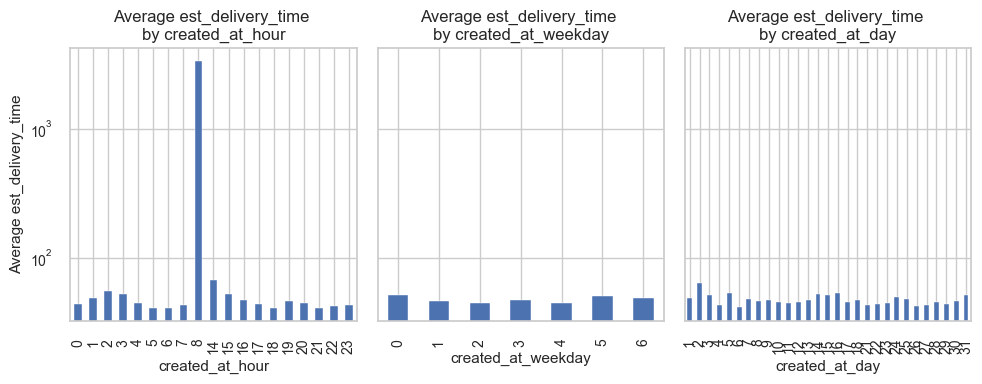

In [160]:
fig, axs = plt.subplots(1,3, figsize=(10,4), sharey=True)

axs = axs.ravel()
i = 0
for grpcol in ['created_at_hour', 'created_at_weekday', 'created_at_day']:
    for col in ['est_delivery_time']:
        ax = df.groupby(grpcol)[col].mean().plot(kind='bar', ax = axs[i])
        ax.set_yscale('log')  # Set y-axis to logarithmic scale
        i += 1
        ax.set_title(f'Average {col} \nby {grpcol}')
        ax.set_xlabel(f'{grpcol}')
        ax.set_ylabel(f'Average {col}')

plt.tight_layout()
plt.show()

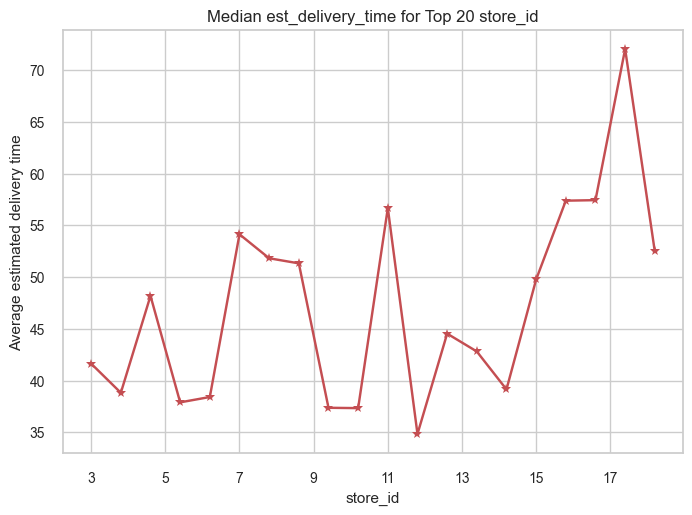

In [161]:
ax = df.groupby('store_id')['est_delivery_time'].median()[df.store_id.value_counts().head(20)].plot(marker='*',c='r')
ax.set_xticklabels(list(range(1, 21, 2)))
ax.set_title('Median est_delivery_time for Top 20 store_id')
ax.set_ylabel('Average estimated delivery time')
plt.show()

# 4. Multivariate Analysis <a class='anchor' id='multivariate'></a> [↑](#top)

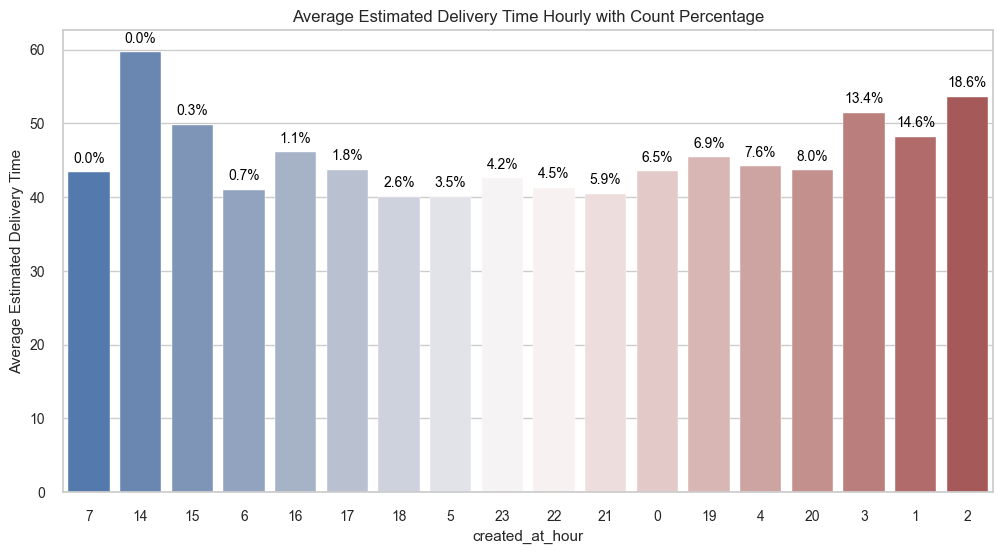

In [117]:
temp = pd.DataFrame({'created_at_hour':df.created_at_hour, 'est_delivery_time':df.est_delivery_time})
temp = temp[temp.est_delivery_time < temp.est_delivery_time.quantile(0.99)].dropna()
temp1 = temp.groupby('created_at_hour')['est_delivery_time'].mean()

plt.figure(figsize=(12,6))
# Count of deliveries for each hour
delivery_count = temp['created_at_hour'].value_counts().sort_index()
delivery_count = delivery_count*100/sum(delivery_count)
delivery_count = delivery_count.sort_values()
ax = sns.barplot(x=temp1.index, y=temp1.values, palette='vlag', order=temp1[delivery_count.sort_values().index].index)

# Annotate bars with custom values
for i, p in enumerate(ax.patches):
    ax.annotate(f'{delivery_count.iloc[i]:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

ax.set_ylabel('Average Estimated Delivery Time')
plt.title('Average Estimated Delivery Time Hourly with Count Percentage')
plt.show()

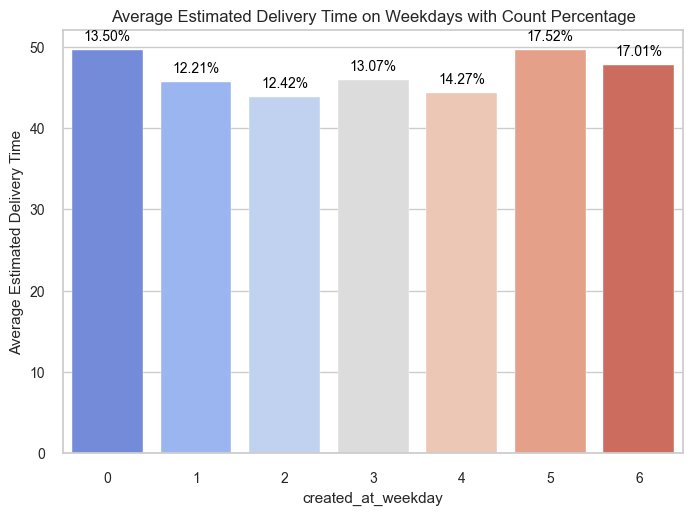

In [118]:
temp = df[df.est_delivery_time < df.est_delivery_time.quantile(0.99)]
temp1 = temp.groupby('created_at_weekday')['est_delivery_time'].mean()

plt.figure(figsize=(8,5.5))
ax = sns.barplot(x=temp1.index, y=temp1.values, palette=sns.color_palette("coolwarm", n_colors=len(temp1)))

# Count of deliveries for each hour
delivery_count = temp['created_at_weekday'].value_counts().sort_index()
delivery_count = delivery_count*100/sum(delivery_count)

# Annotate bars with custom values
for i, p in enumerate(ax.patches):
    ax.annotate(f'{delivery_count.iloc[i]:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

ax.set_ylabel('Average Estimated Delivery Time')
plt.title('Average Estimated Delivery Time on Weekdays with Count Percentage')
plt.show()

In [119]:
# sns.pairplot(df, y_vars='est_delivery_time' )

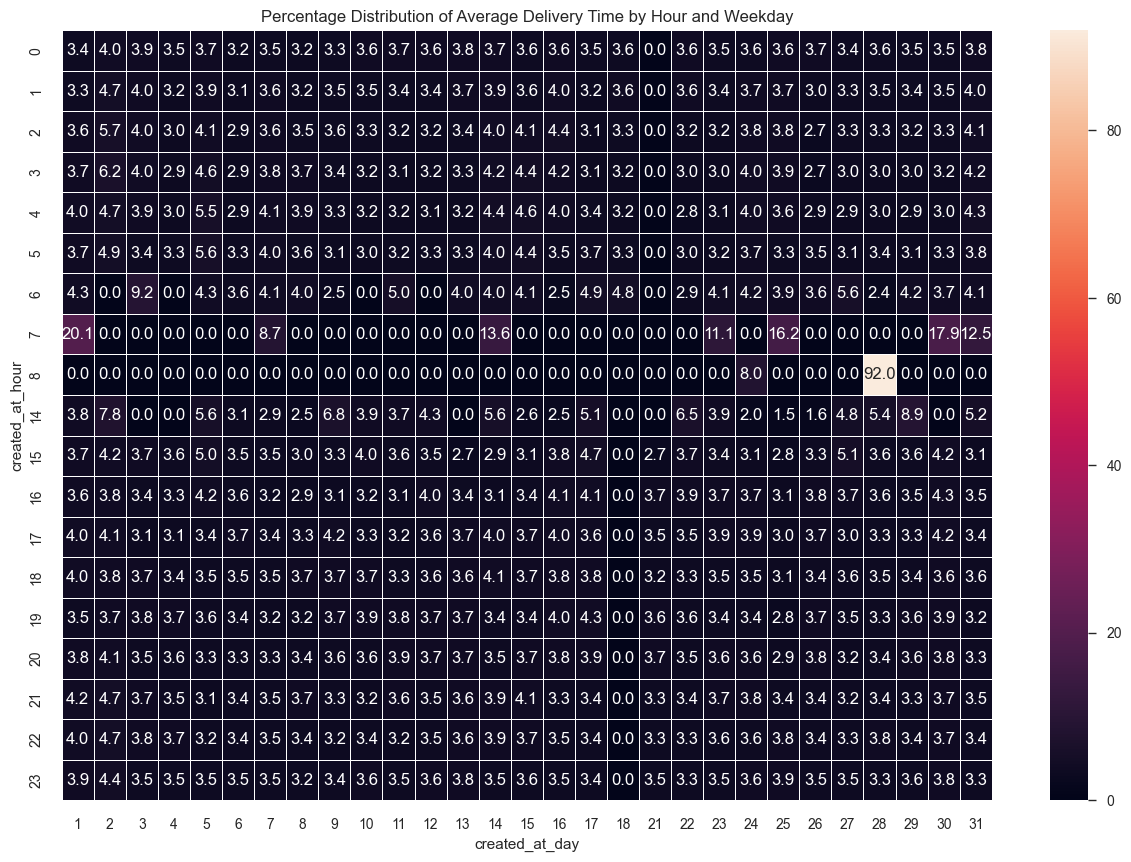

In [120]:
temp = df.groupby(['created_at_hour', 'created_at_day'])['est_delivery_time'].mean().unstack().fillna(0)

temp = temp.div(temp.sum(axis=1), axis=0) * 100

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(temp, annot=True, fmt=".1f", linewidths=.5, ax=ax)
ax.set_title('Percentage Distribution of Average Delivery Time by Hour and Weekday')
plt.show()

* Average est_delivery_time is high for around hours 6, 7 and 14 almost for all days.

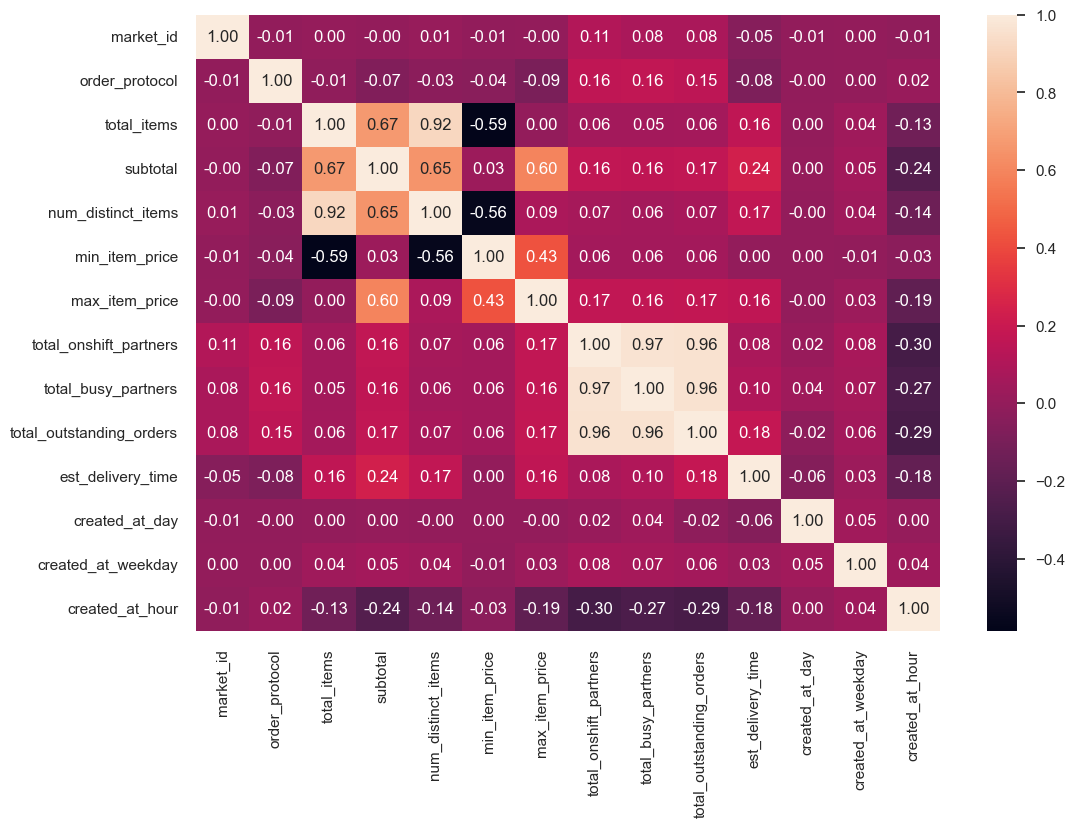

In [121]:
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(df.select_dtypes(exclude='object').corr('spearman'), annot=True, fmt=".2f")
plt.show()

---

# 3. Data Preprocessing and Feature Engineering <a class='anchor' id='feature_eng' ></a> [↑](#top)

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from category_encoders import OrdinalEncoder

In [17]:
encoder = ColumnTransformer(
    [('cat_target', OrdinalEncoder(), ['store_primary_category', 'store_id'])],
    remainder='passthrough',
    verbose_feature_names_out=False
)

In [18]:
encoder.set_output(transform='pandas')
df_ = encoder.fit_transform(df)

In [19]:
df_.apply(lambda x: x.lt(0).sum())

store_primary_category       0
store_id                     0
market_id                    0
order_protocol               0
total_items                  0
subtotal                     0
num_distinct_items           0
min_item_price              12
max_item_price               0
total_onshift_partners      21
total_busy_partners         21
total_outstanding_orders    44
est_delivery_time            0
created_at_day               0
created_at_weekday           0
created_at_hour              0
dtype: int64

In [20]:
df_.loc[(df_ < 0).any(axis=1)]

,store_primary_category,store_id,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,est_delivery_time,created_at_day,created_at_weekday,created_at_hour
790,24,40,1.0,4.0,3,1003,3,-86,1066,24.0,29.0,38.0,44.683333,29,3,2
1351,24,78,2.0,4.0,35,1786,4,-1,488,33.0,36.0,52.0,48.766667,6,4,5
4989,26,205,1.0,2.0,2,1940,1,840,856,11.0,14.0,-2.0,36.116667,18,2,0
6034,1,211,3.0,1.0,2,3538,2,1238,1606,-2.0,2.0,10.0,71.250000,14,5,1
7997,5,300,1.0,3.0,1,1514,1,1116,1063,1.0,-1.0,3.0,53.266667,8,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188786,1,5565,3.0,1.0,1,1345,1,957,1113,2.0,-2.0,23.0,56.766667,11,2,14
190628,27,5618,3.0,4.0,3,2238,3,740,768,-1.0,5.0,10.0,53.483333,5,3,20
191717,7,5641,3.0,1.0,5,2338,4,266,942,8.0,-2.0,8.0,49.150000,5,3,16
192887,4,5680,1.0,3.0,2,5240,2,2516,2644,-2.0,5.0,6.0,43.266667,1,6,4


As the count of negative rows is less we are dropping those rows.

In [21]:
df_ = df_.loc[(df_ >= 0).all(axis=1)]

In [22]:
df_.skew()

store_primary_category        1.182409
store_id                     -0.005106
market_id                     0.229931
order_protocol                0.123472
total_items                  22.779722
subtotal                      1.917559
num_distinct_items            1.574624
min_item_price                2.363913
max_item_price                2.211739
total_onshift_partners        0.860507
total_busy_partners           0.782177
total_outstanding_orders      1.195109
est_delivery_time           108.830183
created_at_day                0.171389
created_at_weekday           -0.172623
created_at_hour               0.625615
dtype: float64

Skewness is very high for some columns and also seen in the EDA there are many outliers present in the dataset. 

So we need to remove outliers.

### Removing outliers from data

In [23]:
z_scores = stats.zscore(df_.est_delivery_time)

# As we already know est_delivery_time is right skewed we are removing values that has zscore > 3
print(f"Removing {(z_scores>3).sum()} rows where est_delivery_time have z_score > 3")
df_ = df_[(z_scores < 3)]

Removing 653 rows where est_delivery_time have z_score > 3


In [24]:
df_.shape

(180413, 16)

In [25]:
df_

,store_primary_category,store_id,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,est_delivery_time,created_at_day,created_at_weekday,created_at_hour
0,1,1,1.0,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,6,4,22
1,2,2,2.0,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,10,1,21
2,1,2,3.0,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.683333,22,3,20
3,1,2,3.0,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.250000,3,1,21
4,1,2,3.0,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.833333,15,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,24,5789,1.0,4.0,3,1389,3,345,649,17.0,17.0,23.0,65.116667,17,1,0
197424,24,5789,1.0,4.0,6,3010,4,405,825,12.0,11.0,14.0,56.383333,13,4,0
197425,24,5789,1.0,4.0,5,1836,3,300,399,39.0,41.0,40.0,50.133333,24,5,4
197426,5,5790,1.0,1.0,1,1175,1,535,535,7.0,7.0,12.0,65.116667,1,6,18


In [26]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest


outlier_removal = LocalOutlierFactor(n_neighbors=10)
df_['lof_anomaly_score'] = outlier_removal.fit_predict(df_)
print("Number of outliers : ",(len(df_[df_['lof_anomaly_score'] == -1])))

Number of outliers :  1712


In [27]:
iclf = IsolationForest()
df_['isolation_anomaly'] = iclf.fit_predict(df_.drop('lof_anomaly_score', axis=1))

In [28]:
df_.isolation_anomaly.value_counts()

isolation_anomaly
 1    129300
-1     51113
Name: count, dtype: int64

In [29]:
df_ = df_[df_['lof_anomaly_score'] == 1].copy()

# drop anomaly column
df_.drop(['lof_anomaly_score', 'isolation_anomaly'],axis=1,inplace=True)

In [30]:
df_.shape

(178701, 16)

In [31]:
df_.skew()

store_primary_category      1.182107
store_id                   -0.004136
market_id                   0.228224
order_protocol              0.122811
total_items                 3.811505
subtotal                    1.872841
num_distinct_items          1.559417
min_item_price              2.159051
max_item_price              2.066811
total_onshift_partners      0.859377
total_busy_partners         0.780608
total_outstanding_orders    1.190181
est_delivery_time           1.069445
created_at_day              0.169830
created_at_weekday         -0.173099
created_at_hour             0.624252
dtype: float64

In [32]:
df_ = df_.sample(frac=1)

In [33]:
X, X_test, y, y_test = train_test_split(df_.drop('est_delivery_time', axis=1), df_.est_delivery_time, test_size=0.2, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
preprocessor = Pipeline(
    [
    ('standard_scale', StandardScaler())]
).set_output(transform='pandas')

In [35]:
scale_y = StandardScaler()
y_train = scale_y.fit_transform(y_train.values.reshape(-1,1))

In [36]:
y_val = scale_y.transform(y_val.values.reshape(-1,1))
y_test = scale_y.transform(y_test.values.reshape(-1,1))

In [37]:
X_train.columns

Index(['store_primary_category', 'store_id', 'market_id', 'order_protocol',
       'total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'created_at_day', 'created_at_weekday',
       'created_at_hour'],
      dtype='object')

In [38]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def feature_imp(X_train, X_test, y_train, y_test):
    r2scores=[]
    adjustedr2 = []
    feature_names=[]
    for i in range(1, 11):   
        reduce_dim_pipe = Pipeline(steps=[
            ('preprocess', preprocessor),
            ('reduce_dim', SelectKBest(k=i, score_func=f_regression)),       
        ])
        
        pipeline = Pipeline(steps=[
            ('reduce_dim_pipe', reduce_dim_pipe),       
            ('regress', LinearRegression())
        ])
        
        # calculate cross validated R2
        R2 = cross_val_score(pipeline, X=X_train, y=y_train,cv=10, scoring='r2').mean()    
        r2scores.append(R2)
            
        # calculate Adj R2
        n= len(X_train)
        p = i #len(X.columns)
        adj_R2 = 1- ((1-R2) * (n-1)/(n-p-1)) #Adj R2 = 1-(1-R2)*(n-1)/(n-p-1)
        # print(R2, adj_R2)
        adjustedr2.append(adj_R2)
        
        reduce_dim_pipe.fit(X=X_train, y=y_train)
        # Get columns to keep    
        cols = reduce_dim_pipe.named_steps['reduce_dim'].get_support(indices=True)
        # Create new dataframe with only desired columns
        # print(cols)
        features_df_new = X_train.iloc[:, cols]
        best_features = list(features_df_new.columns)
        # print(best_features)
        feature_names.append(best_features)

    scoring_df = pd.DataFrame(np.column_stack((r2scores, adjustedr2)), columns=['R2', 'Adj_R2'])
    scoring_df['feature_names'] = feature_names
    scoring_df['features'] = range(1, 11)
    return scoring_df

In [39]:
feature_imp(X_train, 
            X_test, 
            y_train, y_test)

,R2,Adj_R2,feature_names,features
0,0.052566,0.052557,[subtotal],1
1,0.081466,0.081450,"[subtotal, total_outstanding_orders]",2
2,0.089459,0.089435,"[subtotal, total_outstanding_orders, created_a...",3
3,0.090097,0.090066,"[subtotal, num_distinct_items, total_outstandi...",4
4,0.090447,0.090407,"[subtotal, num_distinct_items, max_item_price,...",5
5,0.090469,0.090421,"[total_items, subtotal, num_distinct_items, ma...",6
6,0.143049,0.142996,"[total_items, subtotal, num_distinct_items, ma...",7
7,0.189422,0.189365,"[total_items, subtotal, num_distinct_items, ma...",8
8,0.193494,0.193430,"[order_protocol, total_items, subtotal, num_di...",9
9,0.194546,0.194476,"[order_protocol, total_items, subtotal, num_di...",10


In [40]:
feature_imp(X_train.drop(['total_items', 'total_busy_partners'], axis=1), 
            X_test.drop(['total_items', 'total_busy_partners'], axis=1), 
            y_train, y_test)

,R2,Adj_R2,feature_names,features
0,0.052566,0.052557,[subtotal],1
1,0.081466,0.081450,"[subtotal, total_outstanding_orders]",2
2,0.089459,0.089435,"[subtotal, total_outstanding_orders, created_a...",3
3,0.090097,0.090066,"[subtotal, num_distinct_items, total_outstandi...",4
4,0.090447,0.090407,"[subtotal, num_distinct_items, max_item_price,...",5
5,0.184326,0.184284,"[subtotal, num_distinct_items, max_item_price,...",6
6,0.188817,0.188767,"[order_protocol, subtotal, num_distinct_items,...",7
7,0.190879,0.190823,"[order_protocol, subtotal, num_distinct_items,...",8
8,0.194277,0.194213,"[market_id, order_protocol, subtotal, num_dist...",9
9,0.194279,0.194209,"[store_id, market_id, order_protocol, subtotal...",10


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score

regressors = {
    "lr": LinearRegression(),
    "dt": DecisionTreeRegressor(),
    "rf": RandomForestRegressor(),
    "xgb": XGBRegressor(),
    "lgb": LGBMRegressor()
}

for name, reg in regressors.items():
    model = Pipeline([('prep', preprocessor), (name, reg)])
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    print(f'{name:<5} r2: {r2_score(y_test, pred):.5f}')

lr    r2: 0.19968
dt    r2: -0.40367
xgb   r2: 0.34340
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1791
[LightGBM] [Info] Number of data points in the train set: 114368, number of used features: 15
[LightGBM] [Info] Start training from score 0.000000
lgb   r2: 0.33156


In [104]:
from sklearn.model_selection import GridSearchCV
xgb = XGBRegressor()
model_xgb = Pipeline([('prep', preprocessor), ('xgb', xgb)])
# Define the hyperparameters grid
param_grid = {
    'xgb__n_estimators': [130],  # list(range(100,500,20))
    'xgb__learning_rate': [0.2],  # list(np.arange(0.1,0.6,0.1))
    'xgb__max_depth': [7],
    'xgb__min_child_weight': [13],  
    'xgb__gamma': [0.2],  
    'xgb__colsample_bytree': [0.6],
    'xgb__reg_alpha': [10],                         # L1 regularization (like LASSO) 
    'xgb__reg_lambda': [1],                         # L2 regularization (like Ridge) 
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train, xgb__eval_metric='rmse', xgb__eval_set=[(X_train, y_train),(X_val, y_val)], xgb__verbose=False)
display("Best Hyperparameters:", grid_search.best_params_)
print(f"Best Score: ", grid_search.best_score_)

'Best Hyperparameters:'

{'xgb__colsample_bytree': 0.6,
 'xgb__gamma': 0.2,
 'xgb__learning_rate': 0.2,
 'xgb__max_depth': 7,
 'xgb__min_child_weight': 13,
 'xgb__n_estimators': 130,
 'xgb__reg_alpha': 10,
 'xgb__reg_lambda': 1}

Best Score:  0.34996936602010853


In [91]:
# res = grid_search.cv_results_
# for i in range(len(res["params"])):
#   if res['rank_test_score'][i] < 5:
#     print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")

In [105]:
model = grid_search
pred = model.predict(X_test)

print(f'r2: {r2_score(y_test, pred):.5f}')
print(f'mean_squared_error: {mean_squared_error(y_test, pred):.5f}')

r2: 0.35369
mean_squared_error: 0.64597


r2: 0.34340
